In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [24]:
def show_image_with_grid(img):
    fig,ax = plt.subplots(1,1,figsize=(30,30))
    height, width, _ = img.shape
    
    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, width+1, 50)
    minor_ticks = np.arange(0, width+1, 10)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.9)

    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 10}

    plt.rc('font', **font)
    ax.imshow(img, cmap='gray')
    plt.show()

In [25]:
def find_center(image, thresh_low = 150, thresh_high = 255, debug = False):
    img = image.copy()
    h, w, _ = img.shape
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (15, 15), 0)

    ret,thresh = cv2.threshold(blur,thresh_low,thresh_high,cv2.THRESH_BINARY)
    if(debug):
        plt.imshow(255-thresh)
        plt.show()
    # find contours in the thresholded image
    cnts = cv2.findContours(255-thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    # loop over the contours
    cX = int(w/2)
    cY = int(h/2)
    max_countour_size = 0
    for c in cnts:
        img = image.copy()
        if (c.shape[0]>max_countour_size):
            max_countour_size = c.shape[0]
            # compute the center of the contour
            M = cv2.moments(c)
            #print(M)
            if(M["m00"] == 0):
                return int(w/2), int(h/2)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
            cv2.circle(img, (cX, cY), 7, (255, 255, 255), -1)
            cv2.putText(img, "center", (cX - 20, cY - 20),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            # show the image
            #plt.imshow(img)
            #plt.show()
    cv2.circle(img, (cX, cY), 7, (0, 0, 255), -1)
    if(debug):
        plt.imshow(img)
        plt.show()
    return cX, cY

In [26]:
original_prefix = 'data_original/original/'
sdr_prefix = 'data_original/sdr/'
dest_path_orig = 'data_alligned/original/'
dest_path_sdr = 'data_alligned/sdr/'

In [27]:
index = 181
sdr_img = cv2.imread(sdr_prefix + str(index) + ".png",1)
orig_img = cv2.imread(original_prefix + str(index) + ".png",1)

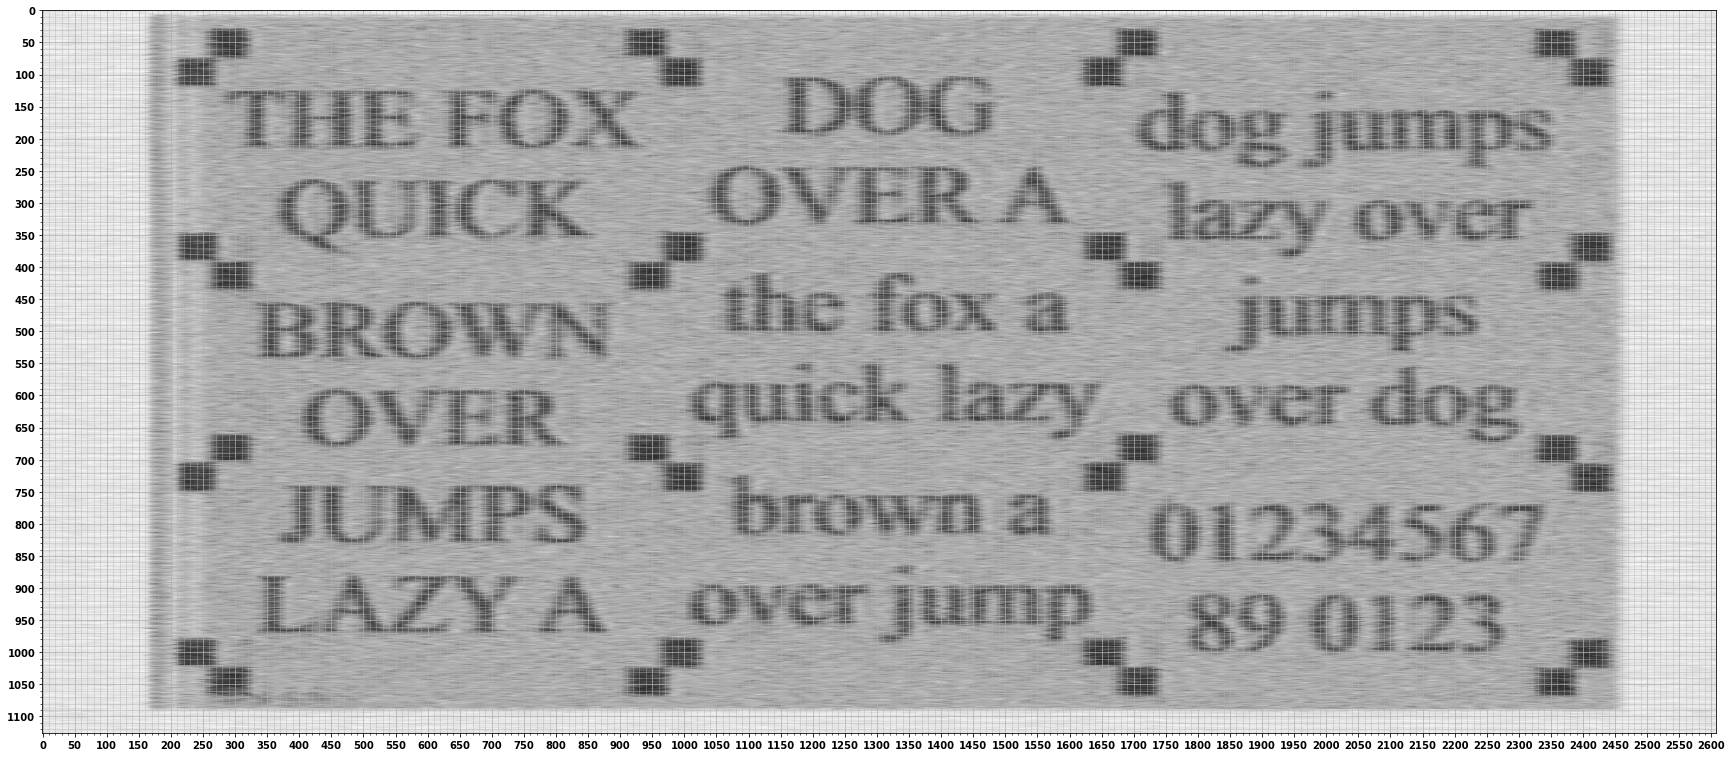

In [28]:

show_image_with_grid(sdr_img)

In [29]:

upper_left_corners_orig = [[[20,20], [610,20], [1210,20], [1805,20]],
                         [[20,340], [610,340],[1210,340], [1805,340]],
                          [[20,650], [610,650],[1210,650], [1805,650]],
                          [[20,965], [610,965],[1210,965], [1805,965]]]

under_right_corners_orig =[[[110,110],[705,110], [1305,110], [1900,110]],
                          [[110,430],[705,430],[1305,430],[1900,430]],
                          [[110,740],[705,740],[1305,740],[1900,740]],
                          [[110,1060],[705,1060],[1305,1060],[1900,1060]]]

upper_left_corners_orig = [[[20,20], [610,20], [1210,20], [1805,20]],
                         [[20,340], [610,340],[1210,340], [1805,340]]]
under_right_corners_orig =[[[110,110],[705,110], [1305,110], [1900,110]],
                          [[110,430],[705,430],[1305,430],[1900,430]]]

upper_left_corners = [[[200,20], [900,20], [1610,20], [2320,20]],
                     [[200,335], [900,335],[1610,335], [2320,335]],
                     [[200,650], [900,650],[1610,650], [2320,650]],
                     [[200,970], [900,970],[1610,970], [2320,970]]]

under_right_corners =[[[330,130],[1030,130], [1745,130], [2445,130]],
                      [[330,440],[1030,440],[1745,440],[2445,440]],
                     [[330,760],[1030,760],[1745,760],[2445,760]],
                     [[330,1075],[1030,1075],[1745,1075],[2445,1075]]]


upper_left_corners_orig = [[[20,20], [610,20], [1210,20], [1805,20]],
                         [[20,340], [610,340],[1210,340], [1805,340]],
                          [[20,650], [610,650],[1210,650], [1805,650]],
                          [[20,965], [610,965],[1210,965], [1805,965]]]

under_right_corners_orig =[[[110,110],[705,110], [1305,110], [1900,110]],
                          [[110,430],[705,430],[1305,430],[1900,430]],
                          [[110,740],[705,740],[1305,740],[1900,740]],
                          [[110,1060],[705,1060],[1305,1060],[1900,1060]]]
TOLERANCE = 10
def extract_patches(img, upper_left_corners, under_right_corners, low, high, debug = False):
    cropped_images = []
    for i in range(len(upper_left_corners)-1):
        for j in range(3):
            patches = []
            upper_lefts = []
            upper_left = upper_left_corners[i][j]
            under_right = under_right_corners[i][j] 
            patch = img[upper_left[1]-TOLERANCE:under_right[1]+TOLERANCE,upper_left[0]-TOLERANCE:under_right[0]+TOLERANCE]
            patches.append(patch)
            upper_lefts.append(upper_left)

            upper_left = upper_left_corners[i+1][j]
            under_right = under_right_corners[i+1][j] 
            patch = img[upper_left[1]-TOLERANCE:under_right[1]+TOLERANCE,upper_left[0]-TOLERANCE:under_right[0]+TOLERANCE]
            patches.append(patch)
            upper_lefts.append(upper_left)

            upper_left = upper_left_corners[i+1][j+1]
            under_right = under_right_corners[i+1][j+1] 
            patch = img[upper_left[1]-TOLERANCE:under_right[1]+TOLERANCE,upper_left[0]-TOLERANCE:under_right[0]+TOLERANCE]
            patches.append(patch)
            upper_lefts.append(upper_left)

            upper_left = upper_left_corners[i][j+1]
            under_right = under_right_corners[i][j+1] 
            patch = img[upper_left[1]-TOLERANCE:under_right[1]+TOLERANCE,upper_left[0]-TOLERANCE:under_right[0]+TOLERANCE]
            patches.append(patch)
            upper_lefts.append(upper_left)

            cXs = []
            cYs = []
            for (p, upper_left) in zip(patches, upper_lefts): 
                cX, cY =  find_center(p, low, high, debug)
                cXs.append(cX + upper_left[0]-TOLERANCE)
                cYs.append(cY + upper_left[1]-TOLERANCE)
            left_upper = [int((cXs[0]+cXs[1])/2.0), int((cYs[0]+cYs[3])/2.0)]
            right_under = [int((cXs[2]+cXs[3])/2.0), int((cYs[2]+cYs[1])/2.0)] 

            cropped_image = img[left_upper[1]:right_under[1],left_upper[0]:right_under[0]]
            cropped_images.append(cropped_image)
    return cropped_images


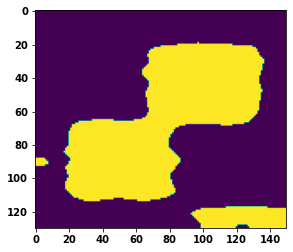

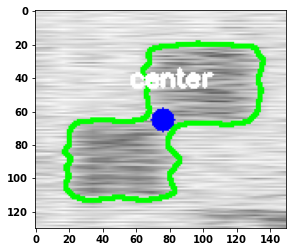

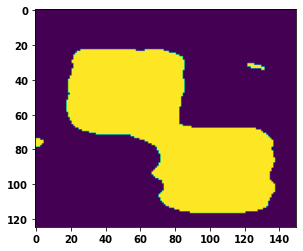

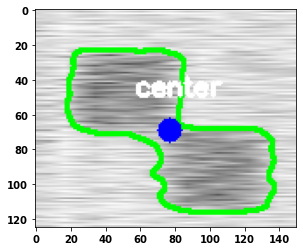

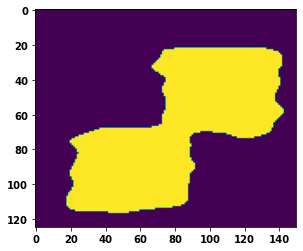

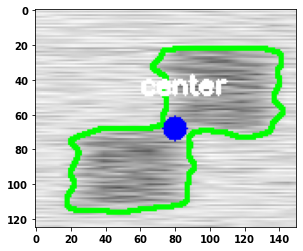

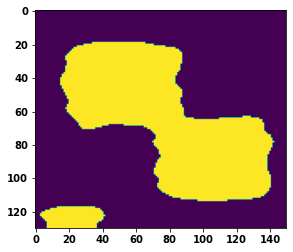

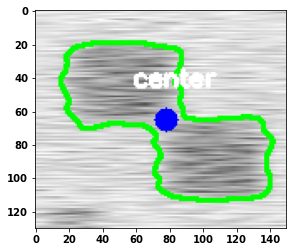

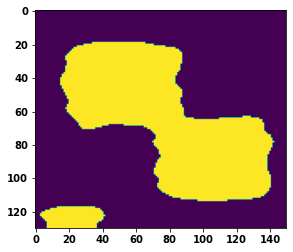

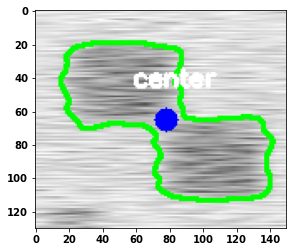

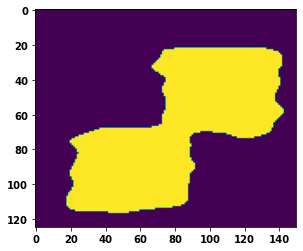

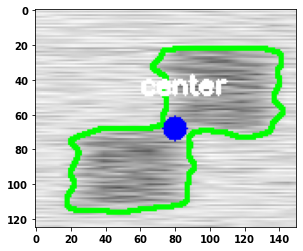

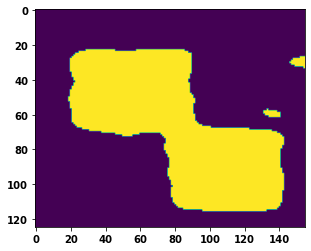

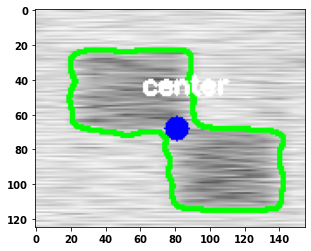

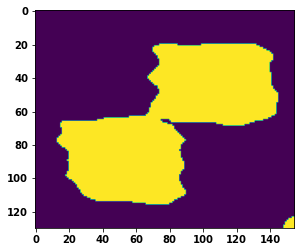

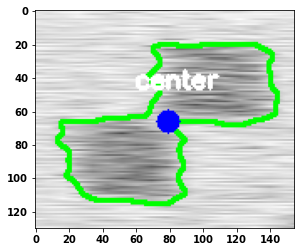

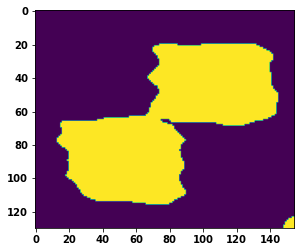

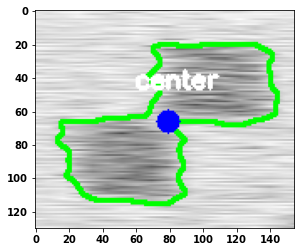

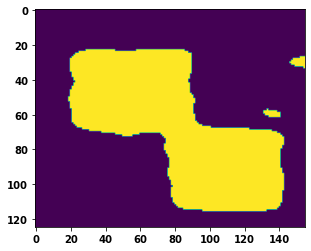

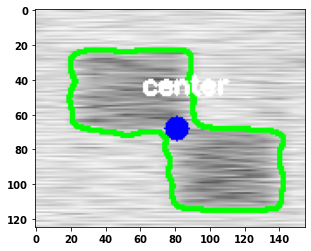

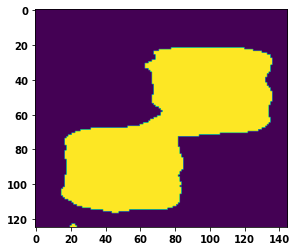

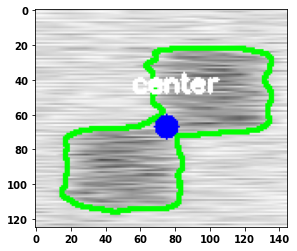

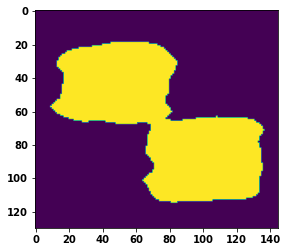

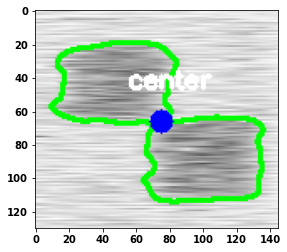

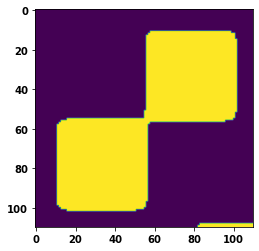

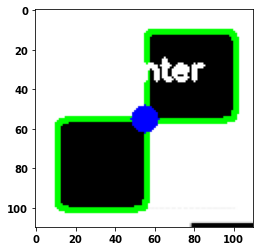

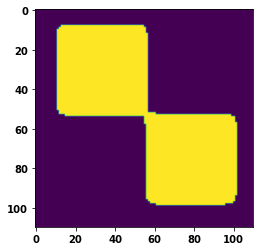

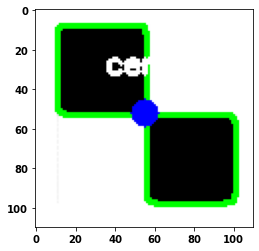

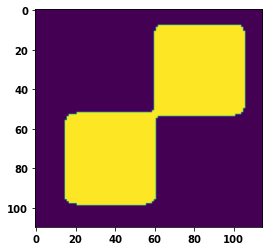

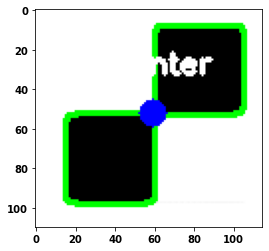

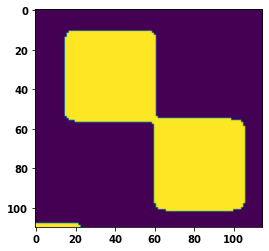

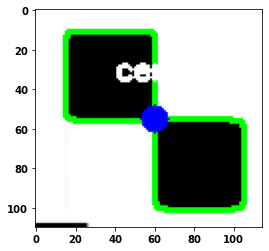

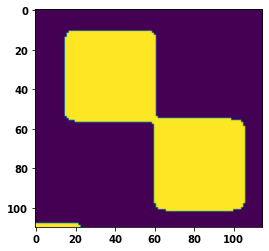

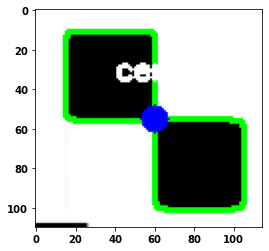

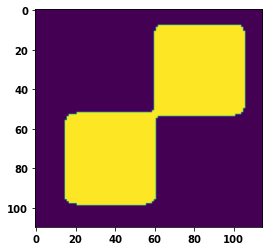

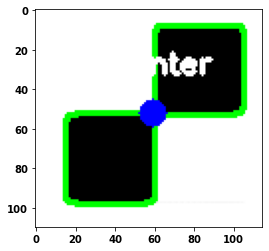

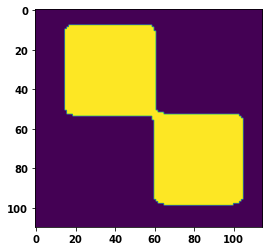

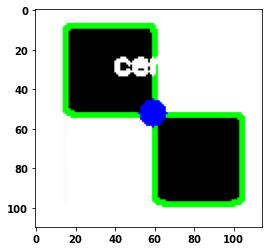

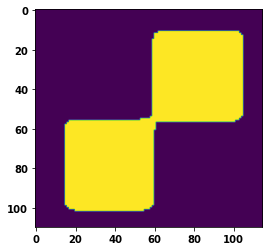

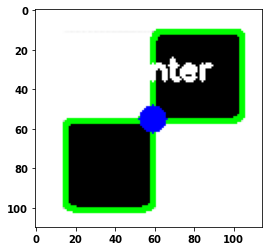

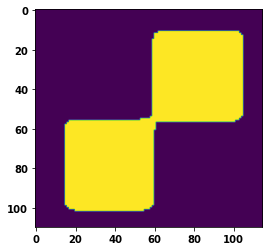

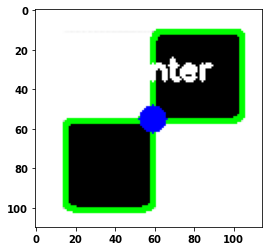

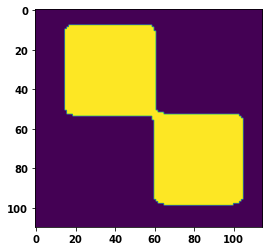

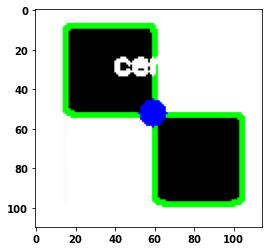

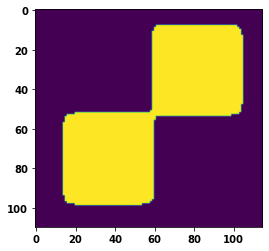

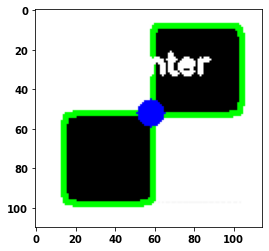

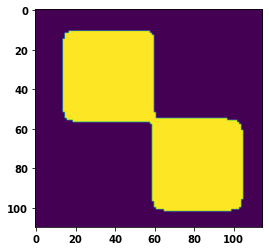

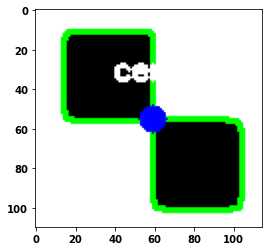

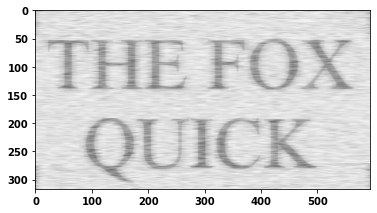

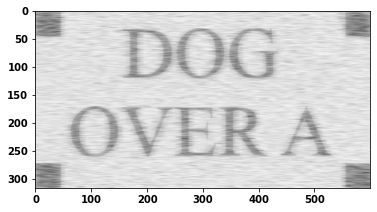

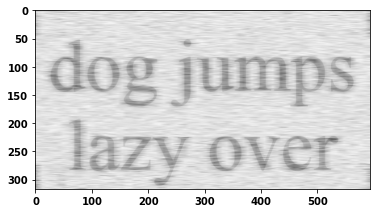

In [30]:
upper_left_corners = [[[200,20], [900,20], [1610,20], [2320,20]],
                     [[200,335], [900,335],[1610,335], [2320,335]]]
under_right_corners =[[[330,130],[1030,130], [1745,130], [2445,130]],
                      [[330,440],[1030,440],[1745,440],[2445,440]]]

upper_left_corners_orig = [[[20,20], [610,20], [1210,20], [1805,20]],
                         [[20,340], [610,340],[1210,340], [1805,340]]]
under_right_corners_orig =[[[110,110],[705,110], [1305,110], [1900,110]],
                          [[110,430],[705,430],[1305,430],[1900,430]]]
LOW = 205
HIGH = 255
index = 10
sdr_img = cv2.imread(sdr_prefix + str(index) + ".png",1)
orig_img = cv2.imread(original_prefix + str(index) + ".png",1)
sdr_patches = extract_patches(sdr_img, upper_left_corners, under_right_corners, LOW, HIGH, debug = True)
orig_patches = extract_patches(orig_img, upper_left_corners_orig, under_right_corners_orig, 150, HIGH, debug = True)

for (orig_patch, sdr_patch) in zip(orig_patches, sdr_patches):
    h, w, _ = orig_patch.shape
    sdr_patch = cv2.resize(sdr_patch, (w,h))
    mixed_img= cv2.addWeighted(orig_patch,0.1,sdr_patch,0.9,0)
    plt.imshow(mixed_img)
    plt.show()

In [31]:
upper_left_corners = [[[200,20], [900,20], [1610,20], [2320,20]],
                     [[200,335], [900,335],[1610,335], [2320,335]],
                     [[200,650], [900,650],[1610,650], [2320,650]],
                     [[200,970], [900,970],[1610,970], [2320,970]]]

under_right_corners =[[[330,130],[1030,130], [1745,130], [2445,130]],
                      [[330,440],[1030,440],[1745,440],[2445,440]],
                     [[330,760],[1030,760],[1745,760],[2445,760]],
                     [[330,1075],[1030,1075],[1745,1075],[2445,1075]]]


upper_left_corners_orig = [[[20,20], [610,20], [1210,20], [1805,20]],
                         [[20,340], [610,340],[1210,340], [1805,340]],
                          [[20,650], [610,650],[1210,650], [1805,650]],
                          [[20,965], [610,965],[1210,965], [1805,965]]]

under_right_corners_orig =[[[110,110],[705,110], [1305,110], [1900,110]],
                          [[110,430],[705,430],[1305,430],[1900,430]],
                          [[110,740],[705,740],[1305,740],[1900,740]],
                          [[110,1060],[705,1060],[1305,1060],[1900,1060]]]

LOW = 205
HIGH = 255
dest_alligned_sdr = 'data_alligned/sdr/'
dest_alligned_orig = 'data_alligned/original/'
k = 1
for idx in range(1,181):
   # print(idx)
    sdr_img = cv2.imread(sdr_prefix + str(idx) + ".png",1)
    orig_img = cv2.imread(original_prefix + str(idx) + ".png",1)
    sdr_patches = extract_patches(sdr_img, upper_left_corners, under_right_corners, LOW, HIGH)
    orig_patches = extract_patches(orig_img, upper_left_corners_orig, under_right_corners_orig, LOW, HIGH)

    for (orig_patch, sdr_patch) in zip(orig_patches, sdr_patches):
        h, w, _ = sdr_patch.shape
        orig_patch = cv2.resize(orig_patch, (w,h))
        cv2.imwrite(dest_alligned_sdr + str(k) + '.png', sdr_patch)
        cv2.imwrite(dest_alligned_orig + str(k) + '.png', orig_patch)
        k += 1
#         mixed_img= cv2.addWeighted(orig_patch,0.1,sdr_patch,0.9,0)
#         plt.imshow(mixed_img)
#         plt.show()

print('{} patches pairs generated'.format(k))
        

1621 patches pairs generated


In [32]:
LOW = 140
HIGH = 255
dest_alligned_sdr = 'data_alligned/sdr/'
dest_alligned_orig = 'data_alligned/original/'
for idx in range(181,361):
    sdr_img = cv2.imread(sdr_prefix + str(idx) + ".png",1)
    orig_img = cv2.imread(original_prefix + str(idx) + ".png",1)
    sdr_patches = extract_patches(sdr_img, upper_left_corners, under_right_corners, LOW, HIGH)
    orig_patches = extract_patches(orig_img, upper_left_corners_orig, under_right_corners_orig, LOW, HIGH)

    for (orig_patch, sdr_patch) in zip(orig_patches, sdr_patches):
        h, w, _ = sdr_patch.shape
        orig_patch = cv2.resize(orig_patch, (w,h))
        cv2.imwrite(dest_alligned_sdr + str(k) + '.png', sdr_patch)
        cv2.imwrite(dest_alligned_orig + str(k) + '.png', orig_patch)
        k += 1
#         mixed_img= cv2.addWeighted(orig_patch,0.1,sdr_patch,0.9,0)
#         plt.imshow(mixed_img)
#         plt.show()

print('{} patches pairs generated'.format(k))
        

3241 patches pairs generated


In [11]:
# LOW = 47
# HIGH = 255
# dest_alligned_sdr = 'data_alligned/sdr/'
# dest_alligned_orig = 'data_alligned/original/'
# for idx in range(361,541):
#     sdr_img = cv2.imread(sdr_prefix + str(idx) + ".png",1)
#     orig_img = cv2.imread(original_prefix + str(idx) + ".png",1)
#     sdr_patches = extract_patches(sdr_img, upper_left_corners, under_right_corners, LOW, HIGH)
#     orig_patches = extract_patches(orig_img, upper_left_corners_orig, under_right_corners_orig, 140, HIGH)

#     for (orig_patch, sdr_patch) in zip(orig_patches, sdr_patches):
#         h, w, _ = sdr_patch.shape
#         orig_patch = cv2.resize(orig_patch, (w,h))
#         cv2.imwrite(dest_alligned_sdr + str(k) + '.png', sdr_patch)
#         cv2.imwrite(dest_alligned_orig + str(k) + '.png', orig_patch)
#         k += 1
#         #mixed_img= cv2.addWeighted(orig_patch,0.1,sdr_patch,0.9,0)
#         #plt.imshow(mixed_img)
#         #plt.show()

# print('{} patches pairs generated'.format(k))
        

3781 patches pairs generated
